In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


In [2]:
from sys import path
#path.append('./../spineSimulator/')
path.append('./../')
import spineSimulator
import spineSimulator.plot as plot

In [3]:
run_id = 113
for run_id in range(114,124):
    spineSimulator.run(run_id)


simulating [seconds]:  5e-07
Strength of input current: 25.0 pA
Writing results to file every 1 steps.
Writing results to file every 2e-10 seconds.
Writing results at 0.0 ms
[0, 5000, 2501] ##
Writing results at 2e-07 ms
Writing results at 4e-07 ms
Writing results at 6e-07 ms
Writing results at 8e-07 ms
Writing results at 1e-06 ms
Writing results at 1.2e-06 ms
Writing results at 1.4e-06 ms
Writing results at 1.6e-06 ms
Writing results at 1.8e-06 ms
Writing results at 2e-06 ms
Writing results at 2.1999999999999997e-06 ms
Writing results at 2.4e-06 ms
Writing results at 2.5999999999999997e-06 ms
Writing results at 2.8e-06 ms
Writing results at 2.9999999999999997e-06 ms
Writing results at 3.2e-06 ms
Writing results at 3.3999999999999996e-06 ms
Writing results at 3.6e-06 ms
Writing results at 3.799999999999999e-06 ms
Writing results at 4e-06 ms
Writing results at 4.2e-06 ms
Writing results at 4.399999999999999e-06 ms
Writing results at 4.6e-06 ms
Writing results at 4.8e-06 ms
Writing resul

/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:271: RuntimeWarning: divide by zero encountered in divide
  g = 2.* (coeff[1:] * coeff[:-1]) / (coeff[1:] + coeff[:-1])
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:239: RuntimeWarning: divide by zero encountered in divide
  self.r_e = 1./ ( 1./self.r_e_Na + 1./self.r_e_K + 1./self.r_e_Cl )
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:276: RuntimeWarning: invalid value encountered in subtract
  dndt = (current[1:] - current[:-1] ) / self.delta_x
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:246: RuntimeWarning: divide by zero encountered in divide
  return np.square(self.a) / r_e
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/

Writing results at 0.00016380000000000002 ms
Writing results at 0.00016450000000000001 ms
Writing results at 0.00016520000000000003 ms
Writing results at 0.00016590000000000002 ms
Writing results at 0.0001666 ms
Writing results at 0.00016730000000000003 ms
Writing results at 0.000168 ms
Writing results at 0.00016870000000000003 ms
Writing results at 0.00016940000000000002 ms
Writing results at 0.00017010000000000001 ms
Writing results at 0.00017080000000000003 ms
Writing results at 0.00017150000000000002 ms
Writing results at 0.0001722 ms
Writing results at 0.00017290000000000003 ms
Writing results at 0.00017360000000000002 ms
Writing results at 0.0001743 ms
Writing results at 0.00017500000000000003 ms
Writing results at 0.00017570000000000002 ms
Writing results at 0.0001764 ms
Writing results at 0.00017710000000000002 ms
Writing results at 0.0001778 ms
Writing results at 0.00017850000000000003 ms
Writing results at 0.00017920000000000002 ms
Writing results at 0.0001799 ms
Writing resu

/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:274: RuntimeWarning: overflow encountered in multiply
  current = g * (var[1:] - var[:-1]) / self.delta_x
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:274: RuntimeWarning: invalid value encountered in multiply
  current = g * (var[1:] - var[:-1]) / self.delta_x


Writing results at 0.0001824 ms
Writing results at 0.0001832 ms
Writing results at 0.00018399999999999997 ms
Writing results at 0.0001848 ms
Writing results at 0.00018559999999999998 ms
Writing results at 0.0001864 ms
Writing results at 0.0001872 ms
Writing results at 0.000188 ms
Writing results at 0.0001888 ms
Writing results at 0.00018959999999999997 ms
Writing results at 0.0001904 ms
Writing results at 0.00019119999999999999 ms
Writing results at 0.00019199999999999998 ms
Writing results at 0.00019279999999999997 ms
Writing results at 0.00019360000000000002 ms
Writing results at 0.00019439999999999998 ms
Writing results at 0.0001952 ms
Writing results at 0.000196 ms
Writing results at 0.00019679999999999996 ms
Writing results at 0.0001976 ms
Writing results at 0.0001984 ms
Writing results at 0.0001992 ms
Writing results at 0.00019999999999999998 ms
Writing results at 0.00020079999999999997 ms
Writing results at 0.0002016 ms
Writing results at 0.0002024 ms
Writing results at 0.000203

/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:339: RuntimeWarning: overflow encountered in multiply
  self.delta_k(self.const_z_Na)[1:-1] * self.d2fdx2(self.phi, self.g_k(self.r_e_Na))
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:345: RuntimeWarning: overflow encountered in multiply
  self.delta_k(self.const_z_K)[1:-1] * self.d2fdx2(self.phi, self.g_k(self.r_e_K))
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:351: RuntimeWarning: overflow encountered in multiply
  self.delta_k(self.const_z_Cl)[1:-1] * self.d2fdx2(self.phi, self.g_k(self.r_e_Cl))
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/FiniteDifferenceSolver.py:274: RuntimeWarning: invalid value encountered in subtract
  current = g * (var[1:] - var[:-1]) / self.delta_x


Writing results at 0.0002493 ms
Writing results at 0.0002502 ms
Writing results at 0.00025110000000000003 ms
Writing results at 0.00025200000000000005 ms
Writing results at 0.0002529 ms
Writing results at 0.0002538 ms
Writing results at 0.0002547 ms
Writing results at 0.0002556 ms
Writing results at 0.0002565 ms
Writing results at 0.0002574 ms
Writing results at 0.00025830000000000004 ms
Writing results at 0.0002592 ms
Writing results at 0.0002601 ms
Writing results at 0.00026099999999999995 ms
Writing results at 0.0002619 ms
Writing results at 0.0002628 ms
Writing results at 0.0002637 ms
Writing results at 0.0002646 ms
Writing results at 0.00026550000000000006 ms
Writing results at 0.0002664 ms
Writing results at 0.0002673 ms
Writing results at 0.00026819999999999996 ms
Writing results at 0.00026910000000000004 ms
Writing results at 0.00027 ms
Writing results at 0.0002709 ms
Writing results at 0.0002718 ms
Writing results at 0.0002727 ms
Writing results at 0.00027360000000000004 ms
Wr

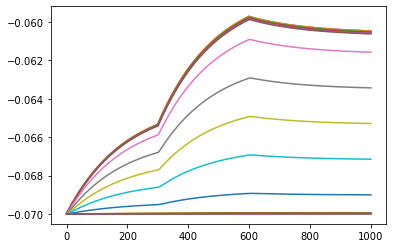

In [5]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_0')

plt.plot(phi)

In [6]:
import pandas
run_id = 0
########################################################
df = pandas.read_excel('./../simulation_parameters.xls')
results_file = './../../simulation_results/experiment_' + str(run_id)

T = df.loc[0, run_id]
delta_t = df.loc[1, run_id]
L = df.loc[2, run_id]
n_h = df.loc[3, run_id]
n_hnj = df.loc[4, run_id]
n_n = df.loc[5, run_id]
n_ndj = df.loc[6, run_id]
n_d = df.loc[7, run_id]
nx = n_h + n_hnj + n_n + n_ndj + n_d
a_h = df.loc[8, run_id]
a_n = df.loc[9, run_id]
a_d = df.loc[10, run_id]
input_type = df.loc[11, run_id]
constants = df.loc[12, run_id]
write_interval = df.loc[13, run_id]
bc_times = [float(v) for v in df.loc[14, run_id].split(',')]
bc_vN_vals = [float(v) for v in df.loc[15, run_id].split(',')]
bc_dir_vals = [float(v) for v in df.loc[16, run_id].split(',')]

boundary_conditions = [bc_times,
          bc_vN_vals,
          bc_dir_vals]

t = spineSimulator.get_t(T, delta_t)
x = spineSimulator.get_x(L, nx)
a = spineSimulator.get_a(n_h, n_hnj, n_n, n_ndj, n_d, nx, a_h, a_n, a_d)

array([2.5e-07, 2.5e-07, 2.5e-07, 2.5e-07, 2.5e-07, 3.5e-08, 3.5e-08,
       3.5e-08, 3.5e-08, 3.5e-08, 4.0e-07, 4.0e-07, 4.0e-07, 4.0e-07])

# Init simulation

In [7]:
#reload(FiniteDifferenceSolver)
spine = spineSimulator.FiniteDifferenceSolver(
    t,x,a,
    bnds=boundary_conditions,
    input_type=input_type,
    file_name=results_file, 
    write_interval=write_interval,
    parameter_set = constants)

TypeError: __init__() missing 1 required positional argument: 'dT'

array([9.01457727e+05, 1.80291545e+06, 2.70437318e+06, 3.60583091e+06,
       4.50728864e+06, 2.79543881e+07, 7.39471293e+07, 1.19939870e+08,
       1.65932612e+08, 2.11925353e+08, 2.35097789e+08, 2.35449921e+08,
       2.35802053e+08, 2.36154185e+08, 2.36506317e+08])

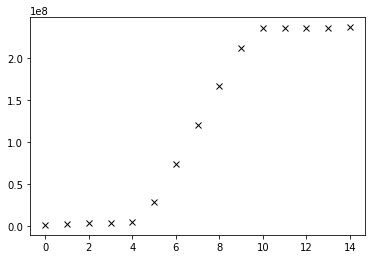

In [23]:
_r_e = spine.r_e / spine.scale_resistance / spine.scale_space
_a = spine.a/spine.scale_space
_dx = spine.delta_x/spine.scale_space
R_e = _r_e * _dx / np.pi / np.square(_a)
#_g_ij = (np.square(_a[1:]) / _r_e[1:] + np.square(_a[:-1]) / _r_e[:-1]) * np.pi / 2. / _dx
_g_ij = (2. * (np.square(_a[1:]) * np.square(_a[:-1])) / 
         (_r_e[1:]*np.square(_a[1:])+_r_e[:-1]*np.square(_a[:-1])) / _dx * np.pi )
plt.plot(np.cumsum(1./_g_ij), 'kx')
np.cumsum(1./_g_ij)

# estimate stability

In [24]:
# STABILTY ANALYSIS
# all numbers have to be smaller 0.5
# then a stable solution can be expected
print(spine.const_q*spine.a/2*spine.gamma() * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.gamma() * spine.h_k('K')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.h_k('K')*spine.delta_t/spine.delta_x**2)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Run simulation and write our results

In [25]:
import time
start_time = time.time()
spine.solve()
end_time = time.time()
time_taken = end_time - start_time
time_taken, 'seconds'

Writing results at 9.999999999999999e-05 ms
Writing results at 0.00019999999999999998 ms
Writing results at 0.0003 ms
Writing results at 0.00039999999999999996 ms
Writing results at 0.0005 ms
Writing results at 0.0006 ms
Writing results at 0.0007000000000000001 ms
Writing results at 0.0007999999999999999 ms
Writing results at 0.0009000000000000001 ms
Writing results at 0.001 ms
Writing results at 0.0011 ms
Writing results at 0.0012 ms
Writing results at 0.0013 ms
Writing results at 0.0014000000000000002 ms
Writing results at 0.0015 ms
Writing results at 0.0015999999999999999 ms
Writing results at 0.0017000000000000001 ms
Writing results at 0.0018000000000000002 ms
Writing results at 0.0019 ms
Writing results at 0.002 ms
Writing results at 0.0021000000000000003 ms
Writing results at 0.0022 ms
Writing results at 0.0023 ms
Writing results at 0.0024 ms
Writing results at 0.0025 ms
Writing results at 0.0026 ms
Writing results at 0.0027 ms
Writing results at 0.0028000000000000004 ms
Writing 

(11.464414596557617, 'seconds')

In [26]:
# time for 1 ms simulation in hours
time_taken * 1.e-3 / T / 3600

0.3184559610154893

(101, 16)


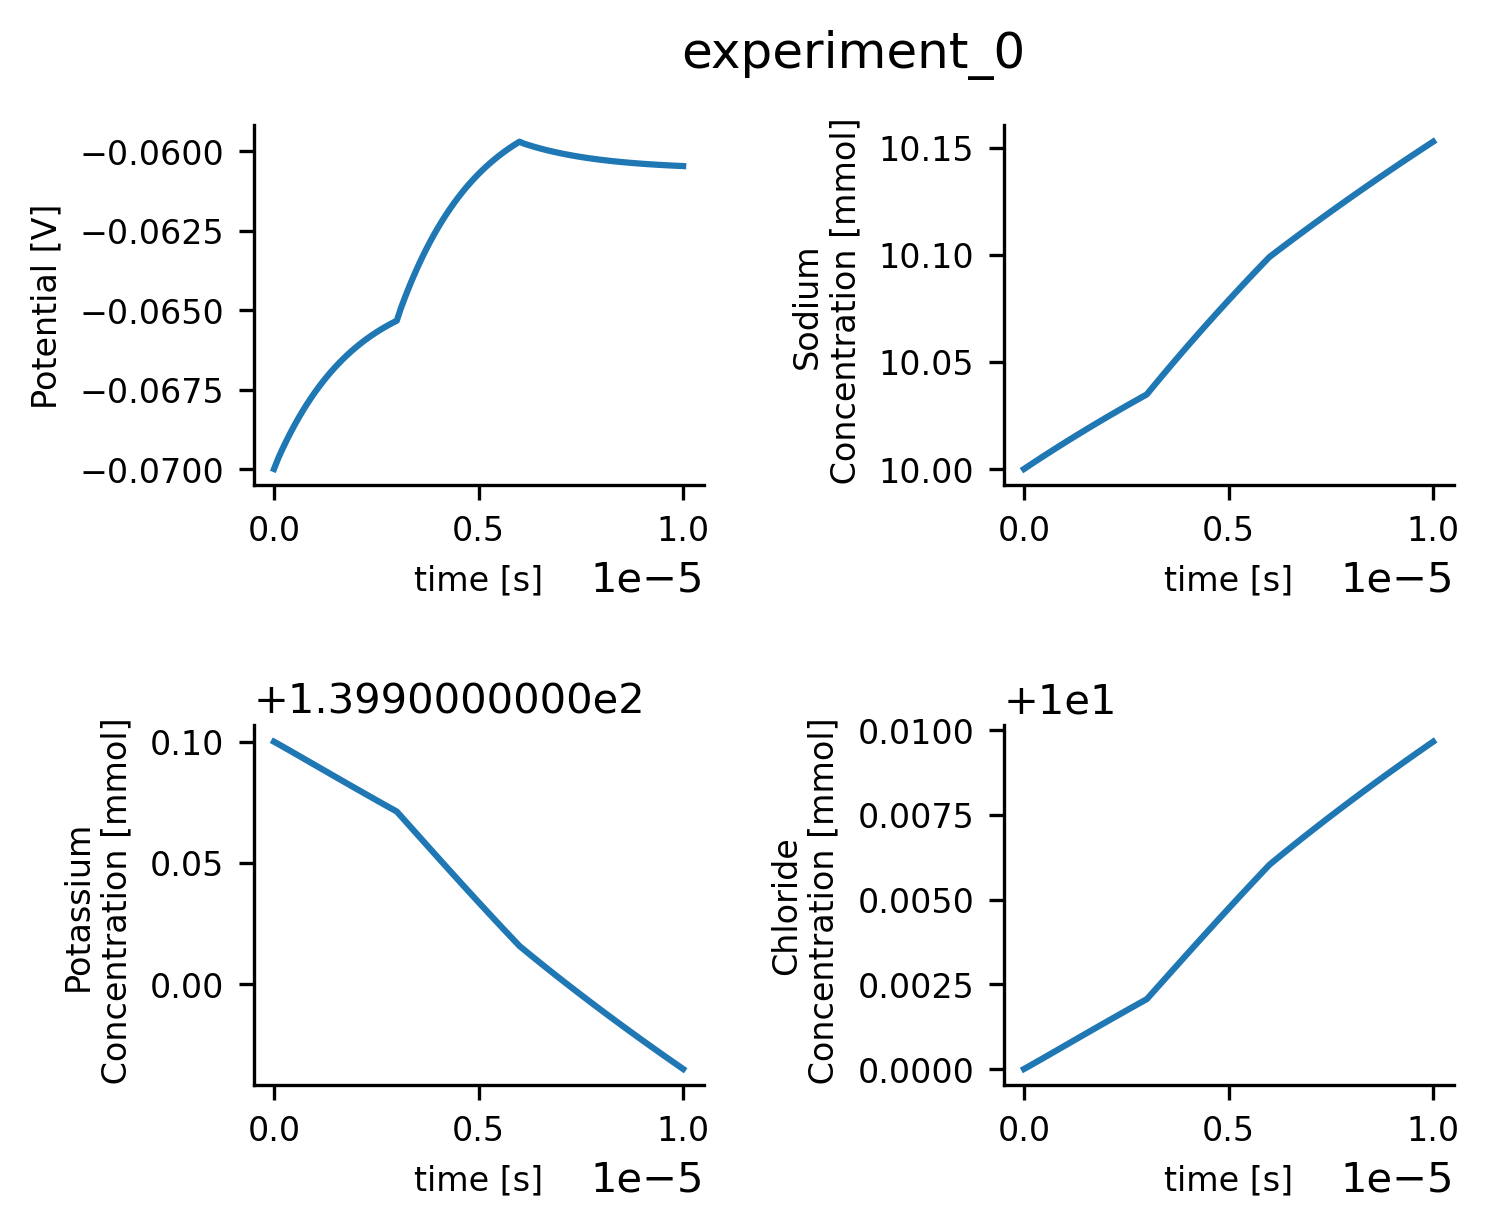

In [5]:
spineSimulator.figure_head_overview('experiment_0')

# Show results

In [10]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a / 2. / spine.const_c_m

array([6.59014019e+02, 6.07066317e+00, 5.99034178e+00, 5.90994703e+00,
       5.82952218e+00, 5.74907828e+00, 5.14136721e+00, 4.01021357e+00,
       2.87901561e+00, 1.74778546e+00, 6.16535495e-01, 4.52694790e-02,
       3.39521543e-02, 2.26347910e-02, 1.13174019e-02, 0.00000000e+00])

In [166]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.38864929e-14, 2.38864929e-14, 2.38123954e-14, 2.36641978e-14,
       2.34418954e-14, 2.32664772e-14, 4.55630872e-15, 3.44520827e-15,
       2.33378928e-15, 1.22206251e-15, 1.22312322e-16, 6.95537537e-16,
       5.56429867e-16, 4.17319115e-16, 2.78217226e-16, 1.39109399e-16,
       0.00000000e+00])

In [167]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.38864927e-14, 2.38864927e-14, 2.38123953e-14, 2.36641978e-14,
       2.34418953e-14, 2.32664772e-14, 4.55630870e-15, 3.44520827e-15,
       2.33378929e-15, 1.22206251e-15, 1.22312253e-16, 6.95541257e-16,
       5.56434015e-16, 4.17326252e-16, 2.78217985e-16, 1.39109232e-16,
       0.00000000e+00])

In [158]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.39000206e-14, 2.39000206e-14, 2.38258349e-14, 2.36774634e-14,
       2.34549041e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313457e-16, 6.95546343e-16,
       5.56437240e-16, 4.17326918e-16, 2.78213070e-16, 1.39104439e-16,
       0.00000000e+00])

In [159]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.39000205e-14, 2.39000205e-14, 2.38258350e-14, 2.36774634e-14,
       2.34549042e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313458e-16, 6.95546296e-16,
       5.56437040e-16, 4.17327783e-16, 2.78218524e-16, 1.39109263e-16,
       0.00000000e+00])

In [100]:
k_B = 1.381e-23  # Boltzmann constant [k_B] = m^2 kg s^-2 K^-1
e = 1.602e-19  # elementary charge [e] = C
T = 310
k_B * T / e * np.log(6.89803959/ 6.022) 

0.003629523629207271

In [116]:
0.8 * spine.const_q * spine.a / 2. / spine.const_c_m / spine.scale_voltage

array([1.602   , 1.602   , 1.602   , 1.602   , 1.602   , 1.605204,
       0.3204  , 0.3204  , 0.3204  , 0.3204  , 0.323604, 2.5632  ,
       2.5632  , 2.5632  , 2.5632  , 2.5632  , 2.5632  ])

# RUN on CNS-Servers

In [1]:
from sys import path
path.append('/home/work/Projects/tof_cam/apisBlue/scripts/')
import sshHandler

def connect(server_ip):
    client = sshHandler.RemoteClient(
        host =  server_ip,
        user = 'eberhardt', 
        password = 'timsP0W4BZM', 
        ssh_key_filepath='/home/work/.ssh/', 
        ssh_key_filename= "id_rsa_atlas",
        connect_by='password', # "password" or "key"
    )
    client.get_ssh_key()
    client.ssh_key.get_base64()

    client.connect()
    client.connect_scp()
    return client

def file_update(client):
    """
    copy current files from local machine to server
    """
    files = [
        'constants.py',
        '__init__.py',
        'simulation_parameters.py',
        'FiniteDifferenceSolver.py',  
        'run.py',

    ]
    local_path = '/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/'
    local_files = [local_path + f for f in files]
    remote_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
    client.file_upload(local_path=local_files, remote_path=remote_path)
    client.file_upload([local_path +  '../simulation_parameters.xls'],remote_path+'../')

    print(local_files)
    
def run_simulations(client, parameter_sets):
    run_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
    py_file = 'run' #.py

    cmd1 = 'cd {p}; chmod +x {f}.py'.format(p=run_path, f=py_file)       
    #print(cmd1)
    stdout = client.execute_command(cmd1)
    #print(stdout)

    for sim_id in parameter_sets:
        run_file = py_file + str(sim_id)
        # copy file
        cmd2 = 'cp {run_path}{pf}.py {run_path}{rf}.py'.format(pf=py_file, rf=run_file, run_path=run_path)
        #print(cmd2)
        stdout = client.execute_command(cmd2)
        #print(stdout)


        process_name = str(sim_id)
        args = str(sim_id)
        client.start_background_process(path=run_path, file_name=run_file+'.py', 
                                        name=process_name, run_argv=args, log_output=True)

        cmd3 = 'rm {run_path}{rf}.py'.format(rf=run_file, run_path=run_path)
        #print(cmd3)
        stdout = client.execute_command(cmd3)
        #print(stdout)
        
def kill_process(client, process_id):
    client.kill_process_by_name('run{pid}.py'.format(pid=process_id))

def check_for_running_process(client, pids):
    # check if process with a certain name is running
    for i in pids:
        cmd = 'ps -C run{i}.py'.format(i=i)
        stdout = client.execute_command(cmd)
        print(i, stdout)
        
def download_results(client, sim_id):
    i = sim_id
    print('download results file ', i)

    files = [
        'experiment_{i}.bak'.format(i=i),
        'experiment_{i}.dat'.format(i=i),
        'experiment_{i}.dir'.format(i=i),
    ]
    local_path = '/home/work/LMUnextCloud/Projects/spineCableSimulation/simulation_results/'
    remote_path = '/home/eberhardt/Projects/spineCableSimulation/simulation_results/'
    remote_files = [remote_path + f for f in files]

    client.download_file(remote_path=remote_files, local_path=local_path)

In [2]:
server_ips = {
    "steinbeck": '10.153.169.22',  # 28 CPUs
    "beckett" : '10.153.169.180',  # no home dir, 24 CPUs
    "poe" : "10.153.169.23",  # 28 CPUs
    "joyce" : "10.153.169.179",  # 24 CPUs
    "shaw" : "172.16.169.24",  # 28 CPUs
    "marktwain" : "172.16.169.21",  # 28 CPUs
    "machado" : "10.153.169.17",  ## 24 CPUs, 48 bit
    "semprun" : "10.153.169.18",  # 24 CPUs
 }

servers = list(server_ips.keys())
servers = [servers[0]]
servers

['steinbeck']

In [3]:
server_pids = {
    "steinbeck": range(199,205),#range(94,100),#list(range(124,139)) + list(range(169,179)),
    "beckett" : range(0),
    "poe" : range(159,169),#range(139,149),
    "joyce" : range(149,159),
    "shaw" : range(0),
    "marktwain" : range(0),
    "machado" : range(0),
    "semprun" : range(179,199),
 }

### Connect to server and copy latest code on servers, run simulations and check if run command was excecuted sucessfully

In [11]:
clients = []
for s in servers:
    sim_ids = range(111,112)#server_pids[s]
    if len(sim_ids)>0:
        print('############################')
        print('start processes on {s}.'.format(s=s))
        ip = server_ips[s]
        client = connect(ip)
        clients.append(client)
        file_update(client)
        run_simulations(client, sim_ids)
        check_for_running_process(client, sim_ids)

############################
start processes on steinbeck.
client created:  10.153.169.22
['/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/constants.py', '/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/__init__.py', '/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/simulation_parameters.py', '/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/FiniteDifferenceSolver.py', '/home/work/LMUnextCloud/Projects/spineCableSimulation/code/spineSimulator/run.py']
cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; nohup ./run111.py 111 &> nohup_111.out & echo "$!" &
received from channels:  b'21748\n'
cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; nohup ./run112.py 112 &> nohup_112.out & echo "$!" &
received from channels:  b'21819\n'
cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; nohup ./run113.py 113 &> nohup_113.out & echo "$!"

In [9]:
# get results 
dids = range(112,124)#server_pids['steinbeck']#range(124, 124+75)
ip = server_ips['steinbeck']
client = connect(ip)
for i in dids:
    download_results(client, i)

client created:  10.153.169.22
download results file  112


KeyboardInterrupt: 

In [6]:
# download logfile
for i in range(100,199):
    files = [
        'nohup_{i}.out'.format(i=i),
    ]
    local_path = '/home/work/LMUnextCloud/Projects/spineCableSimulation/simulation_results/'
    remote_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
    remote_files = [remote_path + f for f in files]

    client.download_file(remote_path=remote_files, local_path=local_path)